In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs, feature
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as mcm
import pandas as pd
import glob
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import gstools as gs


%matplotlib inline

In [2]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15

In [3]:
SalishSeaDF=pd.read_excel('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/SalishSeaBiomassDF.xlsx',engine='openpyxl')

In [4]:
SalishSeaDF

,Unnamed: 0,Unnamed: 0.1,Key,region_name,Lat,Lon,Date,Z_lower,Z_upper,dtUTC,...,Total,Copepods,Amphipods,Euphausiids,MainGroups,Gastropods,Chaetognaths,Crabs,Larvaceans,Month
0,0,0,010218ELIV1151,Bellingham Bay,48.63795,-122.5694,2018-01-02 00:00:00,110.0,0,2018-01-02 19:51:00,...,12.189953,3.065202,5.438239,0.067185,12.189953,0.000000,0.507425,1.223176,1.888727,1
1,1,1,010818SKETV1058,South Sound,47.15243,-122.6586,2018-01-08 00:00:00,122.0,0,2018-01-08 18:58:00,...,35.059787,1.482905,7.505748,0.000000,35.045540,0.014246,0.000000,4.870446,21.186442,1
2,2,2,011119ELIV1052,Bellingham Bay,48.63795,-122.5694,2019-01-11 00:00:00,114.0,0,2019-01-11 18:52:00,...,8.506914,3.067335,4.452295,0.000000,7.856868,0.650047,0.337238,0.000000,0.000000,1
3,3,3,011315CAMV1330,Whidbey Basin,48.05901,-122.3873,2015-01-13 00:00:00,170.0,0,2015-01-13 21:30:00,...,15.115082,7.412901,6.376149,0.000000,15.065975,0.049107,0.004042,1.272882,0.000000,1
4,4,4,011315MUKV1415,Whidbey Basin,47.97166,-122.3222,2015-01-13 00:00:00,190.0,0,2015-01-13 22:15:00,...,26.622828,5.429623,15.713070,0.000000,26.572865,0.049964,0.636865,2.440229,2.353078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,2500,1341,UBC9999099001401,Juan de Fuca,48.30000,-124.0000,8/27/2018,104.0,0,2018-08-28 01:45:00,...,20.249172,4.971285,0.816575,2.963128,16.010473,0.000000,14.673260,0.702630,0.145620,8
2501,2501,1342,UBC9999099001601,Central Strait of Georgia,49.22800,-123.4700,8/30/2016,309.0,0,2016-08-30 19:00:00,...,41.147779,5.849289,22.385763,1.031931,32.627093,0.119610,8.126650,0.031068,0.044325,8
2502,2502,1343,UBC9999099001801,Central Strait of Georgia,49.25000,-123.6670,12/4/2017,375.0,0,2017-12-04 20:00:00,...,7.421247,3.729816,0.986004,0.270400,5.082507,0.689860,0.228260,0.056574,0.000000,12
2503,2503,1344,UBC9999099001901,Central Strait of Georgia,49.25000,-123.6670,1/15/2018,375.0,0,2018-01-15 20:00:00,...,8.693456,4.139019,2.241436,0.219060,6.753492,0.073910,0.380430,0.011412,0.007043,1


In [5]:
TotalZoop = SalishSeaDF.Total
TotalZoop

0       12.189953
1       35.059787
2        8.506914
3       15.115082
4       26.622828
          ...    
2500    20.249172
2501    41.147779
2502     7.421247
2503     8.693456
2504    12.582157
Name: Total, Length: 2505, dtype: float64

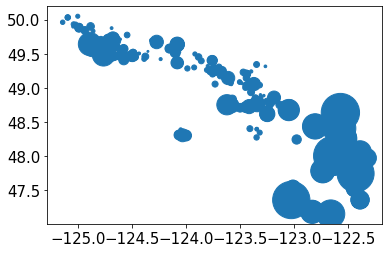

In [6]:
Lon=SalishSeaDF['Lon']
Lat=SalishSeaDF['Lat']
Total=SalishSeaDF['Total']

plt.scatter(x=Lon,y=Lat,s=Total)
plt.show()

In [7]:
SalishSea2014=SalishSeaDF.loc[SalishSeaDF.Year==2014]
SalishSea2015=SalishSeaDF.loc[SalishSeaDF.Year==2015]
SalishSea2016=SalishSeaDF.loc[SalishSeaDF.Year==2016]
SalishSea2017=SalishSeaDF.loc[SalishSeaDF.Year==2017]
SalishSea2018=SalishSeaDF.loc[SalishSeaDF.Year==2018]
SalishSea2019=SalishSeaDF.loc[SalishSeaDF.Year==2019]

In [8]:
mean2014=SalishSea2014['Total'].mean()
mean2015=SalishSea2015['Total'].mean()
mean2016=SalishSea2016['Total'].mean()
mean2017=SalishSea2017['Total'].mean()
mean2018=SalishSea2018['Total'].mean()
mean2019=SalishSea2019['Total'].mean()

In [9]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

/home/ksuchy/anaconda3/envs/py39/lib/python3.9/site-packages/shapefile.py:385: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


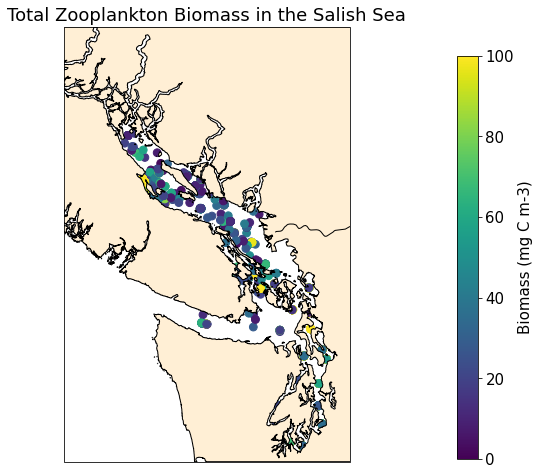

In [10]:
Lon=SalishSeaDF['Lon']
Lat=SalishSeaDF['Lat']
#Total=logt(SalishSeaDF['Total'])
Total=SalishSeaDF['Total']

vmax=100
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-126., -122.], [47., 51.]
ax = plt.subplot(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#ax.set_extent([-126., -122., 47., 51.])
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax.add_feature(feature.RIVERS, edgecolor='k')
st = 2
ax.scatter(Lon,Lat,c=Total,marker='o', s=60, transform=crs.PlateCarree(), norm=normalize)
#gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Biomass (mg C m-3)')
ax.set_title("Total Zooplankton Biomass in the Salish Sea");



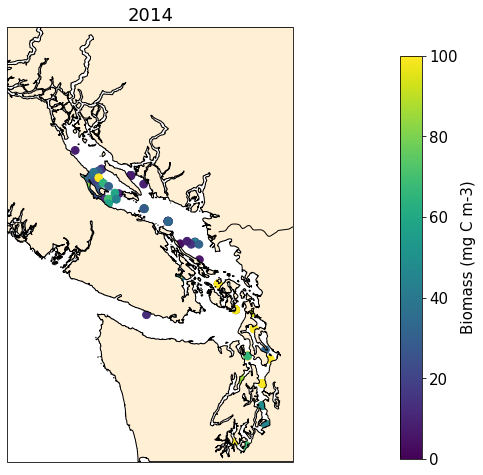

In [11]:
Total2014=SalishSea2014['Total']
Lon2014=SalishSea2014['Lon']
Lat2014=SalishSea2014['Lat']

vmax=100
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-126., -122.], [47., 51.]
ax = plt.subplot(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#ax.set_extent([-126., -122., 47., 51.])
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax.add_feature(feature.RIVERS, edgecolor='k')
st = 2
ax.scatter(Lon2014,Lat2014,c=Total2014,marker='o', s=60, transform=crs.PlateCarree(), norm=normalize)
#gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Biomass (mg C m-3)')
ax.set_title("2014");

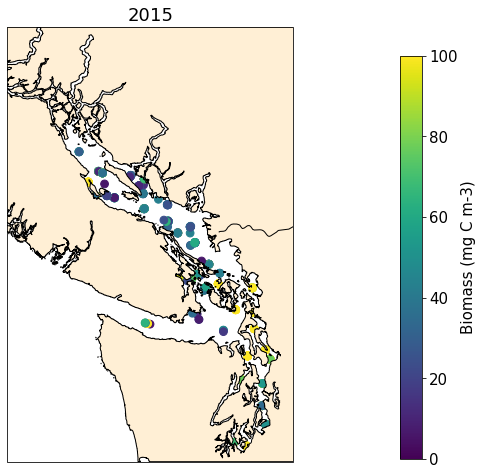

In [12]:
Total2015=SalishSea2015['Total']
Lon2015=SalishSea2015['Lon']
Lat2015=SalishSea2015['Lat']

vmax=100
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-126., -122.], [47., 51.]
ax = plt.subplot(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#ax.set_extent([-126., -122., 47., 51.])
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax.add_feature(feature.RIVERS, edgecolor='k')
st = 2
ax.scatter(Lon2015,Lat2015,c=Total2015,marker='o', s=60, transform=crs.PlateCarree(), norm=normalize)
#gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Biomass (mg C m-3)')
ax.set_title("2015");



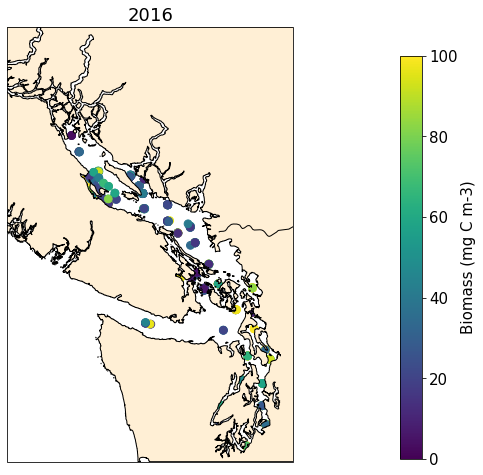

In [13]:
Total2016=SalishSea2016['Total']
Lon2016=SalishSea2016['Lon']
Lat2016=SalishSea2016['Lat']

vmax=100
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-126., -122.], [47., 51.]
ax = plt.subplot(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#ax.set_extent([-126., -122., 47., 51.])
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax.add_feature(feature.RIVERS, edgecolor='k')
st = 2
ax.scatter(Lon2016,Lat2016,c=Total2016,marker='o', s=60, transform=crs.PlateCarree(), norm=normalize)
#gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Biomass (mg C m-3)')
ax.set_title("2016");




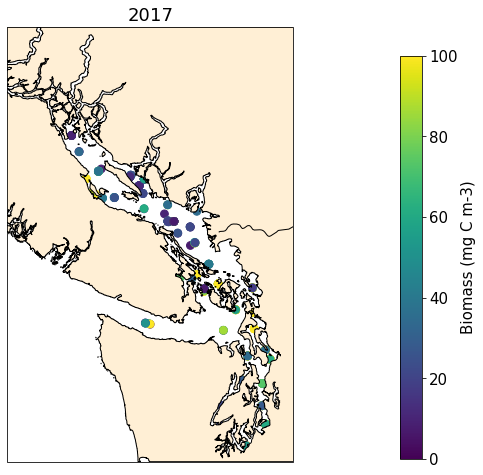

In [14]:
Total2017=SalishSea2017['Total']
Lon2017=SalishSea2017['Lon']
Lat2017=SalishSea2017['Lat']

vmax=100
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-126., -122.], [47., 51.]
ax = plt.subplot(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#ax.set_extent([-126., -122., 47., 51.])
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax.add_feature(feature.RIVERS, edgecolor='k')
st = 2
ax.scatter(Lon2017,Lat2017,c=Total2017,marker='o', s=60, transform=crs.PlateCarree(), norm=normalize)
#gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Biomass (mg C m-3)')
ax.set_title("2017");

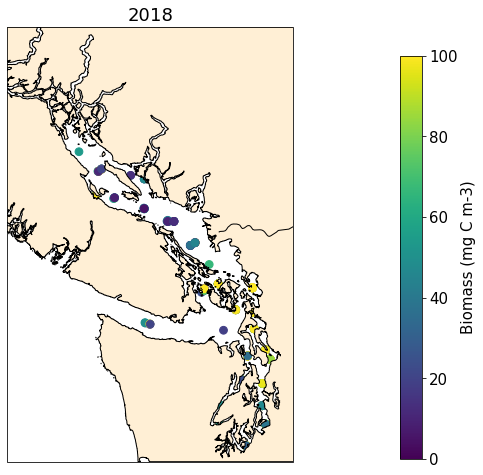

In [15]:
Total2018=SalishSea2018['Total']
Lon2018=SalishSea2018['Lon']
Lat2018=SalishSea2018['Lat']

vmax=100
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-126., -122.], [47., 51.]
ax = plt.subplot(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#ax.set_extent([-126., -122., 47., 51.])
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax.add_feature(feature.RIVERS, edgecolor='k')
st = 2
ax.scatter(Lon2018,Lat2018,c=Total2018,marker='o', s=60, transform=crs.PlateCarree(), norm=normalize)
#gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Biomass (mg C m-3)')
ax.set_title("2018");

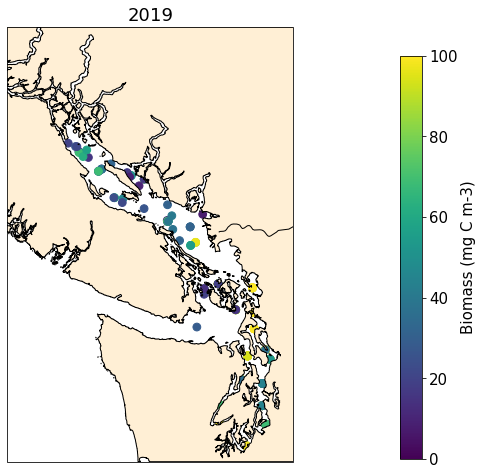

In [16]:
Total2019=SalishSea2019['Total']
Lon2019=SalishSea2019['Lon']
Lat2019=SalishSea2019['Lat']

vmax=100
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-126., -122.], [47., 51.]
ax = plt.subplot(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#ax.set_extent([-126., -122., 47., 51.])
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax.add_feature(feature.RIVERS, edgecolor='k')
st = 2
ax.scatter(Lon2019,Lat2019,c=Total2019,marker='o', s=60, transform=crs.PlateCarree(), norm=normalize)
#gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.viridis, norm=normalize) 
cb.set_label('Biomass (mg C m-3)')
ax.set_title("2019");